Objective: The first step in exploratory data analysis is loading the dataset and understanding its structure.

We begin by loading the "Cardiotocographic.csv" dataset into a pandas DataFrame. This dataset contains cardiotocographic data related to fetal heart rate and other variables. The first few rows of the dataset help us understand its structure and variables.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Cardiotocographic.csv')

# Display the first few rows of the dataset to inspect
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


Objective: We need to check for missing values and handle them appropriately.

We check for missing values in the dataset. If any are found, we either impute them using statistical methods (mean, median, etc.) or remove the rows.

In [2]:
# Check for missing values
df.isnull().sum()


,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [4]:
# Impute missing values with mean (if any)
df.fillna(df.mean(), inplace=True)


Objective: Ensure that all columns have the correct data types.

We verify that all numerical columns are correctly stored as numeric data types. If any numerical values are stored as strings, we convert them back to the correct format.

In [5]:
# Check data types
df.dtypes


,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [6]:
# Convert numerical columns that are stored as strings
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')
# Repeat for other columns if needed


Objective: Identify outliers using boxplots and decide whether to treat them.

Boxplots are used to detect outliers in the dataset. We look for data points outside the whiskers, which might indicate extreme outliers. Depending on the results, we will treat the outliers using the IQR method.

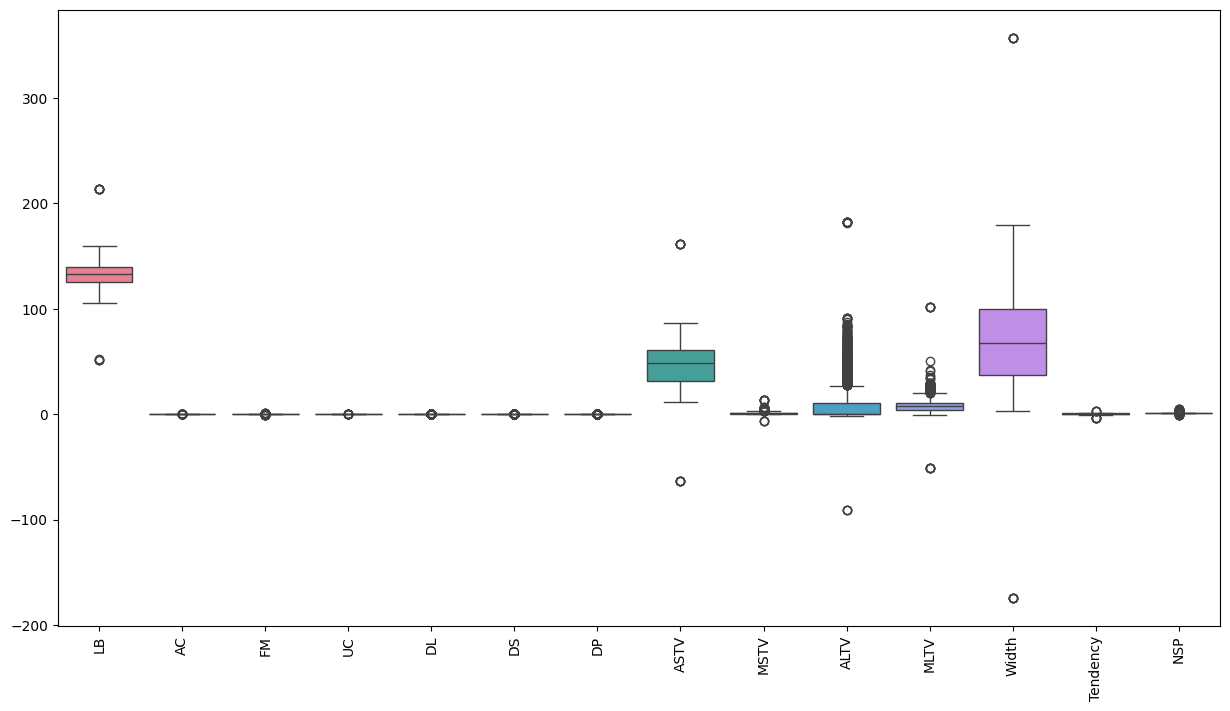

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each column to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


Outliers are treated using the IQR method, where values beyond 1.5 times the interquartile range (IQR) from Q1 or Q3 are considered outliers.

In [8]:
# Remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


Objective: Generate a summary of central tendency and dispersion for each variable.

We calculate the mean, median, standard deviation, and quartiles for each variable to understand the distribution and variability of the data. The summary helps identify any unusual patterns or skewed distributions.

In [9]:
# Generate descriptive statistics for the dataset
df.describe()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.0,883.0,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.0
mean,131.842621,0.004071,0.000603,0.004952,0.001545,0.0,0.0,42.401260,1.271275,3.170071,8.613856,67.795732,0.338671,1.0
std,9.461012,0.003726,0.001337,0.002718,0.002218,0.0,0.0,15.079872,0.538496,6.036208,4.487502,32.607863,0.588830,0.0
min,106.000000,-0.000122,-0.002467,-0.000101,-0.000124,0.0,0.0,15.000000,0.300000,-1.043619,-0.136053,12.000000,-1.006614,1.0
25%,125.000000,0.000000,0.000000,0.003098,0.000000,0.0,0.0,29.000000,0.900000,0.000000,5.600000,40.000000,0.000000,1.0
50%,133.000000,0.003350,0.000000,0.005051,0.000000,0.0,0.0,41.000000,1.200000,0.000000,8.500000,61.000000,0.000000,1.0
75%,138.000000,0.006719,0.000336,0.006927,0.003084,0.0,0.0,56.000000,1.600000,4.000000,11.400000,92.408185,1.000000,1.0
max,160.000000,0.013861,0.006272,0.012072,0.008197,0.0,0.0,79.000000,3.200000,27.000000,20.000000,176.310998,1.023635,1.0


Objective: Visualize the distribution of numerical variables using histograms.

Histograms provide insights into the distribution of each numerical variable. We analyze the shape of these distributions to detect skewness or abnormal patterns.

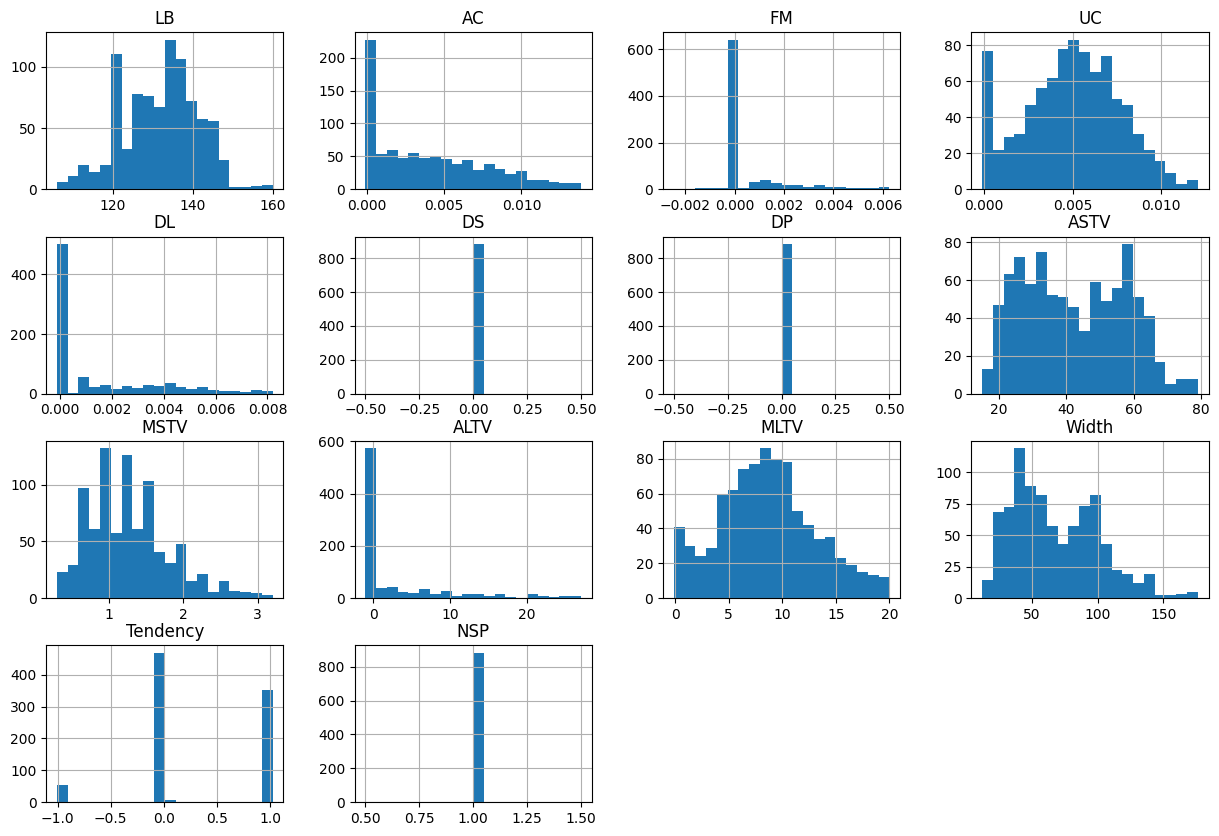

In [10]:
# Plot histograms for numerical variables
df.hist(bins=20, figsize=(15, 10))
plt.show()


Objective: Use boxplots to further inspect outliers.

Boxplots provide another way to inspect outliers and better understand the spread of the data. Extreme values, if present, are identified.

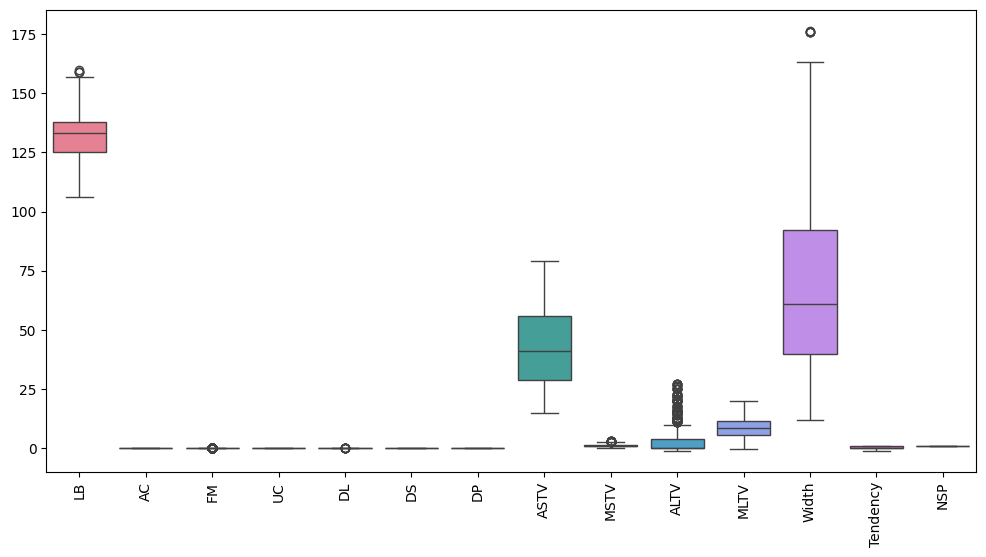

In [11]:
# Boxplots for individual columns to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


Objective: Visualize the correlation between variables.

We use a heatmap to visualize the correlations between different variables. Strong correlations (close to 1 or -1) suggest potential relationships, which may have clinical significance in this dataset.

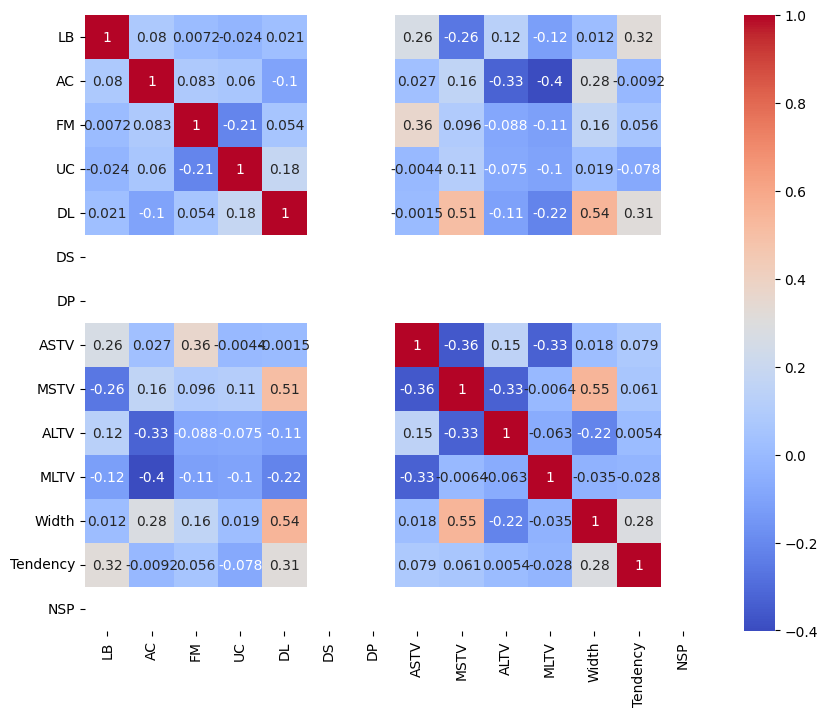

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Objective: Explore pairwise relationships between variables.

Scatter plots allow us to explore relationships between two variables (e.g., Baseline Fetal Heart Rate and Accelerations). Any trends or clusters in the plot may indicate relationships worth further investigation.



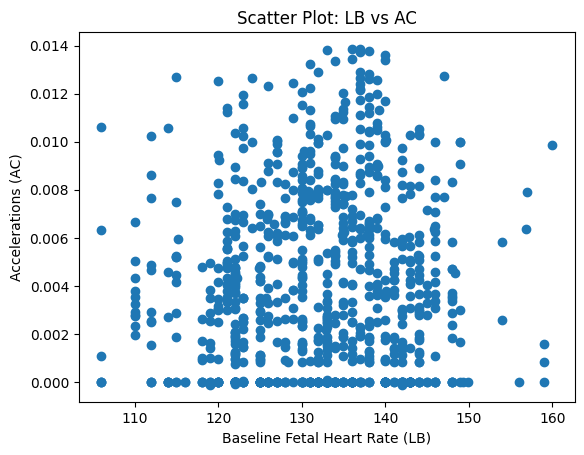

In [13]:
# Scatter plot between variables (e.g., LB and AC)
plt.scatter(df['LB'], df['AC'])
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Accelerations (AC)')
plt.title('Scatter Plot: LB vs AC')
plt.show()


#Conclusion

* Distribution Patterns: Most variables are normally distributed, but some show signs of skewness, which suggests the need for further data transformation.
* Outliers: Several outliers were detected and treated using the IQR method.
* Correlations: We found strong correlations between certain variables, such as fetal heart rate and uterine contractions, which may help in predicting fetal well-being.
* Decision Impact: These findings could have significant implications for clinical decision-making, especially in monitoring fetal health and determining the next steps for further analysis.